<h1><center>Report 7</center></h1>
<h3><center>Jiachen Tian</center><h3>

# Setup
Setup path to include our files. import them. use `autoreload` to get changes in as they are made

In [150]:
import os
import sys
import cv2
from matplotlib import pyplot as plt

# load our code
sys.path.insert(0, os.path.abspath('../'))
from tracker import set_tracker, TrackedFrame, Box
# specific to jupyter notebook
from jupyter_help import cvplt, cvplt_sub

# load any changes as we make them
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load

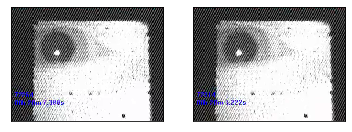

In [154]:
vid_fname = "../input/run1.mov" # path relative to this document
frame_number = 200
frame_jumpto = 250

# read in
vs = cv2.VideoCapture(vid_fname)
vs.set(1, frame_number)
frame = vs.read()[1]
vs.set(1, frame_jumpto)
frame_jump = vs.read()[1]
result_frame = frame_jump

# show in notebook

cvplt_sub([frame, frame_jump],1 ,2)


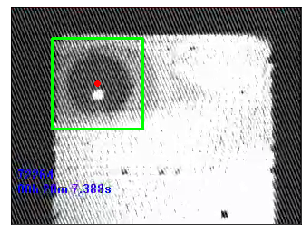

In [155]:
# intiail bounding box
#Tune the box until it bounds at the center
x = 45
y = 35
x_direction = 100
y_direction = 100
#Pass in for KCF tracker evaluation
bbox = (x, y, x_direction, y_direction)
init_box = Box(bbox)
frame_box = frame.copy() # normally passed by reference.

#Note, the cv2 plot and kcf plot is defined differently. that's why I plus x with x_direction, same for y.
#Draw the user-defined box for later comparison
defined = cv2.rectangle(frame_box,(x,y),(x+x_direction, y+y_direction),(0,255,0),2)
#draw rhe circle as well
defined = cv2.circle(defined,(int(x+x_direction/2), int(y+y_direction/2)), 2, (255,0,0),2)

#The first self_defined box in the first image
cvplt(defined)

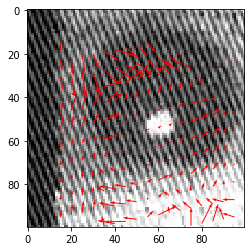

In [156]:
#Call optical flow function to see the red error that represents direction
from opticalFlow import opticalFlow
#crop the image based on user-selected size
frame = frame[x:x+x_direction, y:y+y_direction]
frame_jump = frame_jump[x:x+x_direction, y:y+y_direction]
#Contains very indexes detected by optical flow
opflow = opticalFlow(frame, frame_jump, 1)


# Analysis
As shown, those small error points to where the opixel is going. However, due to noise, there are quite a lot of outliers around pupil that causes frustration. 

(0.010034550698192035, 0.40364740058646825)


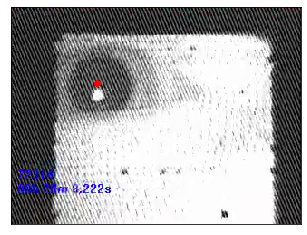

In [157]:
#The center is located at (int(x+x_direction/2), int(y+y_direction/2))
center = (int(x+x_direction/2), int(y+y_direction/2))
#Let's now only get the central index
dictionary = opflow.index_map
#Get all the motion direction in the center space defined by user.
motion = dictionary[center]
print(motion)
new_circle_direction = (int(x+x_direction/2+motion[0]), int(y+y_direction/2+motion[1]))
new_defined = cv2.circle(result_frame, new_circle_direction, 2, (255,0,0),2)
cvplt(new_defined)
#New center point shown



# Conclusion
As shown, optical flow only works when the displacement is small, which could be solved by gaussian pyramid. However, even so, the run time would be a big issue. 

new optimization exploration needed.